In [1]:
%config Completer.use_jedi = False

# Bayesian A/B/C test.
### Calculating Each Advertisement's Probability
- Using <a href="https://en.wikipedia.org/wiki/Beta_distribution">$Beta \space Distribution$</a>.
- Without calculating Integral of joint distribution, approximate the Bayesian probability of each advertisement.
    - Monte Carlo Simulation.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
from scipy.stats import beta, bernoulli
import numpy as np

In [3]:
def dummy_genrator(conversion_rate, n_impression):
    return np.array(bernoulli(conversion_rate).rvs(n_impression))

In [330]:
a = dummy_genrator(0.177470, 8500)
b = dummy_genrator(0.165777, 8500)
imp_a = len(a)
imp_b = len(b)
conv_a = 1500
conv_b = 1410
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))

A 
 Count: 8500
 Conversion: 1500

B 
 Count: 8500
 Conversion: 1410



In [43]:
abtest.params

[[1501, 7001], [1411, 7091]]

In [ ]:
self.posterior_list = [beta(*p).rvs(n_samples) for p in self.params]

In [6]:
beta(1501,8501).rvs(1)

array([0.14357873])

In [79]:
posterior_list_1

array([0.15460562, 0.15378343, 0.14848749, 0.14949916, 0.15009442,
       0.14735806, 0.15894557, 0.15004614, 0.15181264, 0.14843852,
       0.14783516, 0.15587631, 0.14598166, 0.15198312, 0.14759219,
       0.14814518, 0.1555266 , 0.1491514 , 0.14982524, 0.14643985,
       0.14840787, 0.14974963, 0.14952531, 0.15213606, 0.15009562,
       0.15201282, 0.1500748 , 0.14775841, 0.14942644, 0.15861857,
       0.15584095, 0.15454505, 0.15226463, 0.14975305, 0.14854699,
       0.14936483, 0.15107725, 0.1503285 , 0.14698372, 0.14885975,
       0.14922714, 0.15968626, 0.15101827, 0.14990472, 0.1523704 ,
       0.15343095, 0.14793292, 0.15746835, 0.15386144, 0.15943134,
       0.14985273, 0.14278545, 0.15361593, 0.14840381, 0.15476821,
       0.15274181, 0.15347348, 0.15241347, 0.15656274, 0.14612696,
       0.14582781, 0.14778317, 0.14912219, 0.1450221 , 0.15368015,
       0.14340917, 0.14871114, 0.14592215, 0.1479408 , 0.14857944,
       0.14547511, 0.14912929, 0.14858211, 0.14991459, 0.15326

In [17]:
a = (1,2)
a.count(1)

1

In [173]:
(posterior_list_3 > posterior_list_2).sum() - (posterior_list_2 > posterior_list_3).sum()

804

In [179]:
abtest.params

[[1501, 7001], [1411, 7091]]

### Calculation by Formula
- Formulas By Evan Miller
- http://www.evanmiller.org/bayesian-ab-testing.html
>This page collects a few formulas I’ve derived for evaluating A/B tests in a Bayesian context. The formulas on this page are closed-form, so you don’t need to do complicated integral evaluations; they can be computed with simple loops and a decent math library. The advantage of Bayesian formulas over the traditional frequentist formulas is that you don’t have to collect a pre-ordained sample size in order to get a valid result. (See How Not To Run An A/B Test for more context on the “peeking” problem, and Simple Sequential A/B Testing for a frequentist solution to the problem.)

$${\rm Pr}(p_C > \max{\{p_A, p_B\}}) = \int_0^1 \int_0^{p_C} \int_0^{p_C} f(p_A) f(p_B) f(p_C) dp_A dp_B dp_C$$

In [333]:
n = 10000
total = 8000
cv_a = 1600
cv_b = 1500
cv_c = 1580

posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)

### Does Integration take place into 3-Dimension?
- Can it be solved by Monte Carlo simulation?

In [309]:
n = 200000
total = 8000
cv_a = 1600
cv_b = 1500
cv_c = 1580

posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)

print('a win:', prob_a)
print('b win:', prob_b)
print('c win:', prob_c)

prob_a + prob_b + prob_c - 1

a win: 0.65321
b win: 0.022885
c win: 0.34679


0.022885000000000044

### Comparing with Dynamic Yield's Bayesian Probability Calculator
<a href="https://marketing.dynamicyield.com/bayesian-calculator/">Dynamic Yield's BAYESIAN A/B TESTING CALCULATOR</a>

![Dynamic_Yield](dynamic_yield.png)

### Problem
- Total Probability of Advertisements Exceeds 1.0  
- <a href="https://en.wikipedia.org/wiki/Probability_axioms">$Probability\space Exioms$</a>
    - $P(\Omega) = 1$

### Experiment -01
- Calculating bayesian probability for 100 times

In [329]:
total_prob_error = []
for i in range(0,100):
    posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
    posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
    posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

    prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
    prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
    prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)
    
    total_prob_error.append(0)
    total_prob_error[i] = prob_a + prob_b + prob_c - 1
    
    print('Experiment Count :',i+1,  '   The Error of total Probability : ', prob_a + prob_b + prob_c - 1)
    if (i % 10 == 0) & (i != 0) :
        print('\n')
        
print('Mean Error of Probability :',np.mean(total_prob_error), \
      '   Variance of Errors : ', np.var(total_prob_error))

Experiment Count : 1    The Error of total Probability :  0.022669999999999968
Experiment Count : 2    The Error of total Probability :  0.022229999999999972
Experiment Count : 3    The Error of total Probability :  0.02275999999999989
Experiment Count : 4    The Error of total Probability :  0.022559999999999913
Experiment Count : 5    The Error of total Probability :  0.023095000000000088
Experiment Count : 6    The Error of total Probability :  0.022870000000000168
Experiment Count : 7    The Error of total Probability :  0.023410000000000153
Experiment Count : 8    The Error of total Probability :  0.022739999999999982
Experiment Count : 9    The Error of total Probability :  0.022860000000000102
Experiment Count : 10    The Error of total Probability :  0.022580000000000044
Experiment Count : 11    The Error of total Probability :  0.02261500000000005


Experiment Count : 12    The Error of total Probability :  0.022540000000000004
Experiment Count : 13    The Error of total Proba

### 실험 결과 정리
- 오차는 __평균 0.0228__에 __분산은 0.000000135__
- 0.023정도의 __오차를 무시__해도 되는가?
> #### Thompson Sampling과 Bayesian Probability 계산의 접점?
    - Thompson Sampling은 쭉 진행하고, 기준 Traffic 시점에 Bayesian Probability 계산(Thompson Sampling하면서 갖고 있는 각 대안들의 Conversion과 Count 정보를 이용한다. 
        - A : Beta(cv_a + 1, cnt_a - cv_a + 1).rvs(cnt_a)
        - B : Beta(cv_b + 1, cnt_b - cv_b + 1).rvs(cnt_b)
        - C : Beta(cv_c + 1, cnt_c - cv_c + 1).rvs(cnt_c)

#### Making Class of Bayesian A/B test Codes
- From https://github.com/Tdual/bayesianAB/blob/master/BayesianAB.ipynb

In [30]:
class BayesianAB:
    
    def __init__(self, params=None, size=2):
        """
            params are a list of Beta distribution's initial params. e.g. [[alpha of A, beta of A], [alpha of B, beta of B]]
        """
        if params is None:
            self.params = []
            for _ in range(size):
                self.params.append([1,1])
        self.size = len(self.params)
        self.data = []
        for _ in range(size):
            self.data.append([0,0])
        print("the number of comparison: ", self.size)
        self.sampling()
        
    def update(self, data, sampling=True):
        """
         data are a list of pairs of impression and conversion. e.g. [[imp of A, conv of A], [imp of B, conv of B]]
        """
        if self.size != len(data):
            print("No match of the size.")
        
        for p, current, new in zip(self.params, self.data, data):
            imp = new[0]
            conv = new[1]
            current[0] += imp
            current[1] += conv
            p[0] += conv
            p[1] += (imp - conv)
        if sampling:
            self.sampling()
        
        
    def mean_ver(self):
        """
            return [(mean of A, variance of A), (mean of B, variance of B), ...]
        """
        return  [(posterior.mean(), posterior.var())for posterior in self.posterior_list]

        
        
    def sampling(self, n_samples=50000):
        print("num of samples: ", n_samples)
        self.posterior_list = [beta(*p).rvs(n_samples) for p in self.params]


        
    def show_beta(self, title="", save=False, labels=None):
        
        plt.figure(figsize=(10, 5))
        plt.title("Posterior distribution "+ title)
        
        cmap = plt.get_cmap('jet')
        color_list= []
            
        for i, posterior in enumerate(self.posterior_list):
            color =cmap(0.25*(i+1))
            color_list.append(color)
            plt.hist(posterior, bins=100, histtype="stepfilled", normed=True, color=color, alpha=0.5)
        handles = [Rectangle((0,0),1,1,color=c, ec="k", alpha=0.5) for c in color_list]
        
        if labels is None:
            labels = [chr(65+i) for i in range(self.size)] # create A,B,...
            

        plt.legend(handles, labels)
        if save:
            plt.savefig("{}.png".format(title))
        plt.show()
    
    def diff_prob(self, index_high, index_low):
        prob = (self.posterior_list[index_low] < self.posterior_list[index_high]).mean()
        if prob < 0.5:
            prob = 1 - prob
        return prob
    
    def show_metrics(self):
        print(self.data)
        
    def metrics(self, labels=None):
        if labels is None:
            labels = [chr(65+i) for i in range(self.size)] # create A,B,...
        return pd.DataFrame(self.data, index=labels, columns=["Impressions", "Conversions"])
        

In [31]:
abtest = BayesianAB()

the number of comparison:  2
num of samples:  50000


//anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


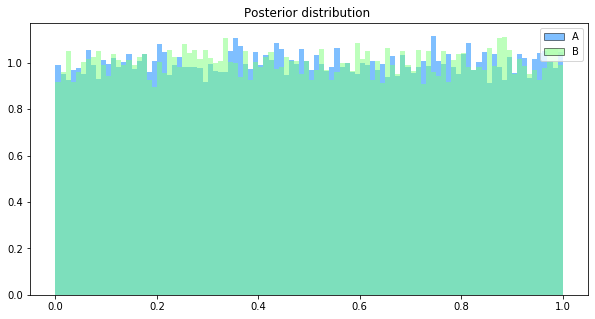

In [32]:
abtest.show_beta()

In [33]:
abtest.update([[imp_a, conv_a], [imp_b, conv_b]])

num of samples:  50000


In [34]:
abtest.mean_ver()

[(0.17655722467724114, 1.7049597134672362e-05),
 (0.16593136597564803, 1.619471031417971e-05)]

## Visualize Distributions of A/B

//anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


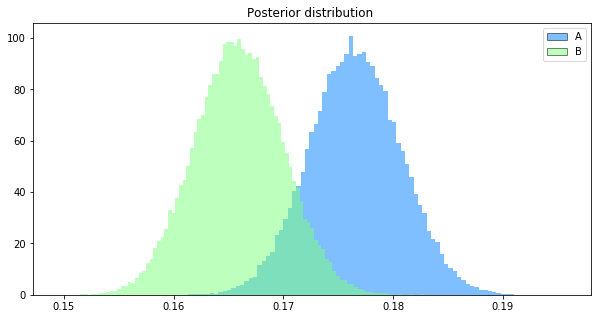

In [35]:
abtest.show_beta()

In [39]:
abtest.diff_prob(0,1)

0.967

In [40]:
abtest.show_metrics()

[[8500, 1500], [8500, 1410]]


In [35]:
a = dummy_genrator(0.015, 20400)
b = dummy_genrator(0.021, 20000)
imp_a = 8500
imp_b = 8500
conv_a = 1500
conv_b = 1410
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))

A 
총노출: 8500
컨버전: 1500

B 
총노출: 8500
컨버전: 1410



In [36]:
abtest.update([[imp_a, conv_a], [imp_b, conv_b]])

num of samples:  50000


In [37]:
abtest.show_metrics()

[[17000, 3000], [17000, 2820]]


In [41]:
abtest.metrics()

,Impressions,Conversions
A,17000,3000
B,17000,2820


In [255]:
a = dummy_genrator(0.015, 1002)
b = dummy_genrator(0.021, 1200)
c = dummy_genrator(0.016, 1130)
imp_a = 8500
imp_b = 8500
imp_c = 8500
conv_a = 1410
conv_b = 1500
conv_c = 1420
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))
print("C \n Counts: {}\n Conversions: {}\n".format(imp_c, conv_c))

A 
총노출: 8500
컨버전: 1410

B 
총노출: 8500
컨버전: 1500

C 
총노출: 8500
컨버전: 1420



## Visualize Distributions of A/B/C

the number of comparison:  3
num of samples:  50000
num of samples:  50000


//anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


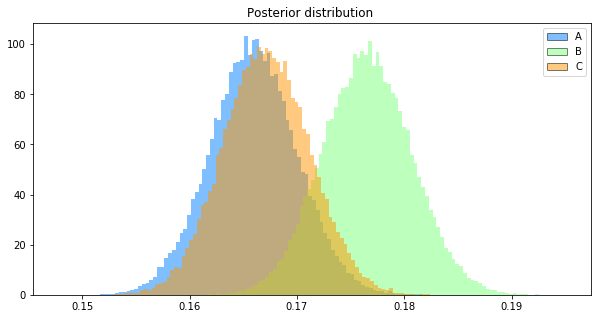

In [264]:
abtest = BayesianAB(size=3)
abtest.update([[imp_a, conv_a], [imp_b, conv_b],[imp_c, conv_c]])
abtest.show_beta()
#abtest.diff_prob()

In [265]:
abtest.metrics()

,Impressions,Conversions
A,8500,1410
B,8500,1500
C,8500,1420


In [48]:
abtest.diff_prob(1,0)

0.9678

In [49]:
abtest.diff_prob(1,2)

0.94788

In [50]:
abtest.diff_prob(2,0)

0.58268

In [37]:
a = dummy_genrator(0.015, 25100)
b = dummy_genrator(0.021, 22000)
c = dummy_genrator(0.016, 23300)
imp_a = len(a)
imp_b = len(b)
imp_c = len(c)
conv_a = np.count_nonzero(a)
conv_b = np.count_nonzero(b)
conv_c = np.count_nonzero(c)
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))
print("C \n Counts: {}\n Conversions: {}\n".format(imp_c, conv_c))

A 
表示数: 25100
購入数: 364

B 
表示数: 22000
購入数: 469

B 
表示数: 23300
購入数: 354



num of samples:  50000


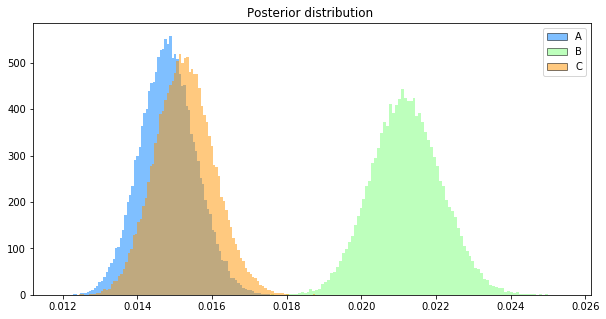

[(0.014823136368344494, 5.586078465062482e-07),
 (0.0212059201285066, 8.839507467322899e-07),
 (0.01526854730312879, 6.223394152971891e-07)]

In [38]:
abtest.update([[imp_a, conv_a], [imp_b, conv_b],[imp_c, conv_c]])
abtest.show_beta()
abtest.mean_ver()

In [39]:
abtest.metrics()

,Impressions,Conversions
A,26102,386
B,23200,491
C,24430,372


In [40]:
abtest.diff_prob(1,0)

1.0

In [41]:
abtest.diff_prob(1,2)

1.0

In [42]:
abtest.diff_prob(0,2)

0.65888

In [43]:
a = dummy_genrator(0.015, 251000)
b = dummy_genrator(0.021, 220000)
c = dummy_genrator(0.016, 233000)
imp_a = len(a)
imp_b = len(b)
imp_c = len(c)
conv_a = np.count_nonzero(a)
conv_b = np.count_nonzero(b)
conv_c = np.count_nonzero(c)
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))
print("C \n Counts: {}\n Conversions: {}\n".format(imp_c, conv_c))

A 
表示数: 251000
購入数: 3808

B 
表示数: 220000
購入数: 4544

B 
表示数: 233000
購入数: 3811



//anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


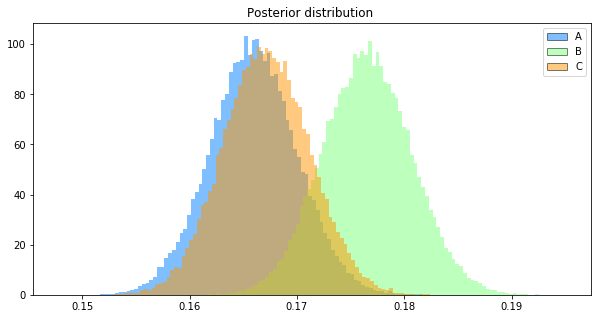

[(0.16594990499619675, 1.64270655848302e-05),
 (0.17655616965069915, 1.7146394418816914e-05),
 (0.16714985398203058, 1.6156047408517524e-05)]

In [266]:
#abtest.update([[imp_a, conv_a], [imp_b, conv_b],[imp_c, conv_c]])
abtest.show_beta()
abtest.mean_ver()

In [267]:
abtest.params

[[1411, 7091], [1501, 7001], [1421, 7081]]

In [272]:
abtest.diff_prob(1,0)

0.96512

In [273]:
abtest.diff_prob(1,2)

0.94726

In [274]:
abtest.diff_prob(2,0)

0.58286

In [270]:
abtest.diff_prob(2,1)

0.94726

In [275]:
abtest.diff_prob(0,2)

0.5828599999999999

### 캠페인 A/B/N 테스트
- Beta 분포 사용가능? (0,1)로 표현 가능한가?
    - 간단한 로직으로 된 캠페인의 경우는 가능